# Data Preprocessing

Q1 Load the provided dataset and perform initial data exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('/content/customer_churn_large_dataset.csv')

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Q2 Handle missing data and outliers

In [ ]:
print(df.isnull().sum())
# no missing values

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [ ]:
df = df.drop('Name', axis=1)

### Data Visualisation

In [ ]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [ ]:
print(df['Churn'].mean())

0.49779


In [ ]:
print(df.groupby('Location')['Churn'].mean())

Location
Chicago        0.498296
Houston        0.491095
Los Angeles    0.492989
Miami          0.503020
New York       0.503659
Name: Churn, dtype: float64


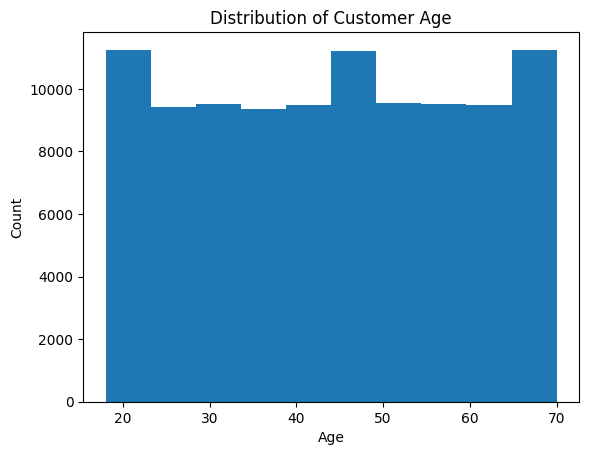

In [ ]:
df['Age'].plot.hist()
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

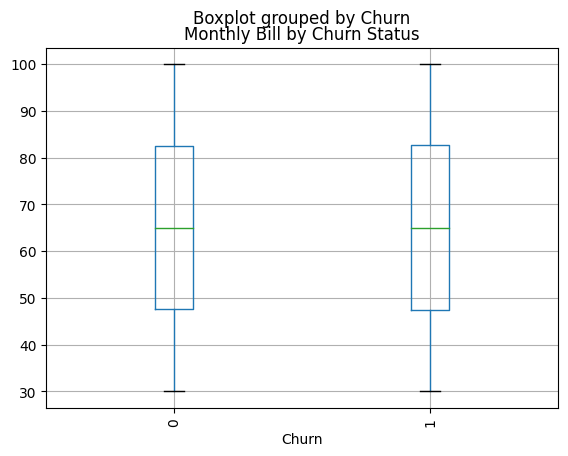

In [ ]:
df.boxplot(column='Monthly_Bill', by='Churn', rot=90)
plt.title('Monthly Bill by Churn Status')
plt.show()

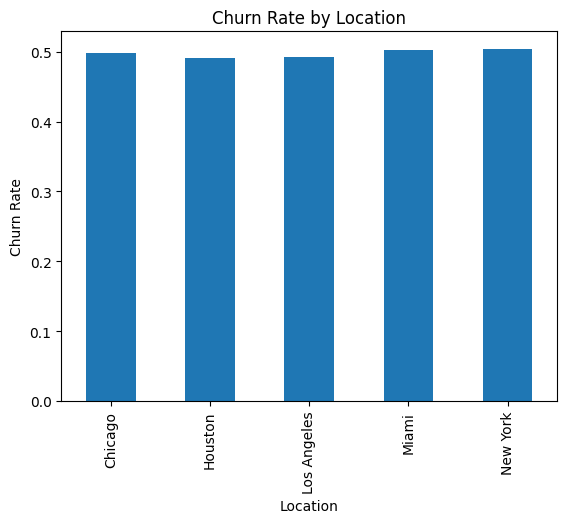

In [ ]:
ax = df.groupby('Location')['Churn'].mean().plot.bar()
ax.set_title('Churn Rate by Location')
ax.set_ylabel('Churn Rate')
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

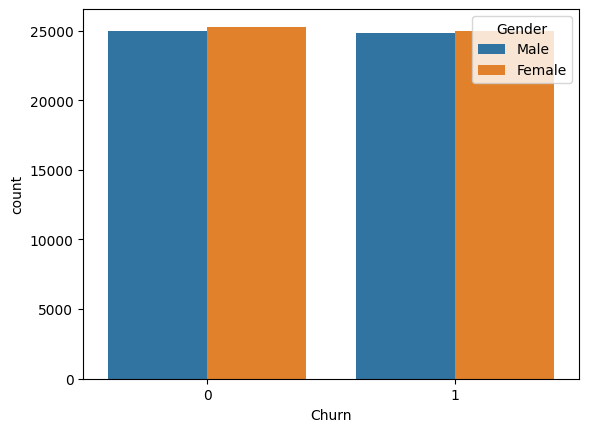

In [ ]:
sns.countplot(data=df, x='Churn', hue='Gender')

<Axes: xlabel='Subscription_Length_Months', ylabel='Density'>

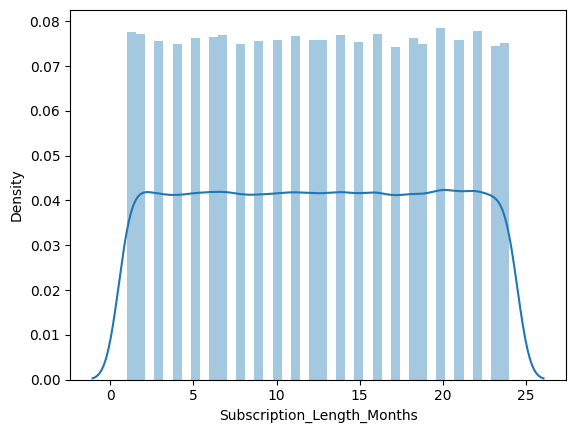

In [ ]:
sns.distplot(df['Subscription_Length_Months'])

<Axes: >

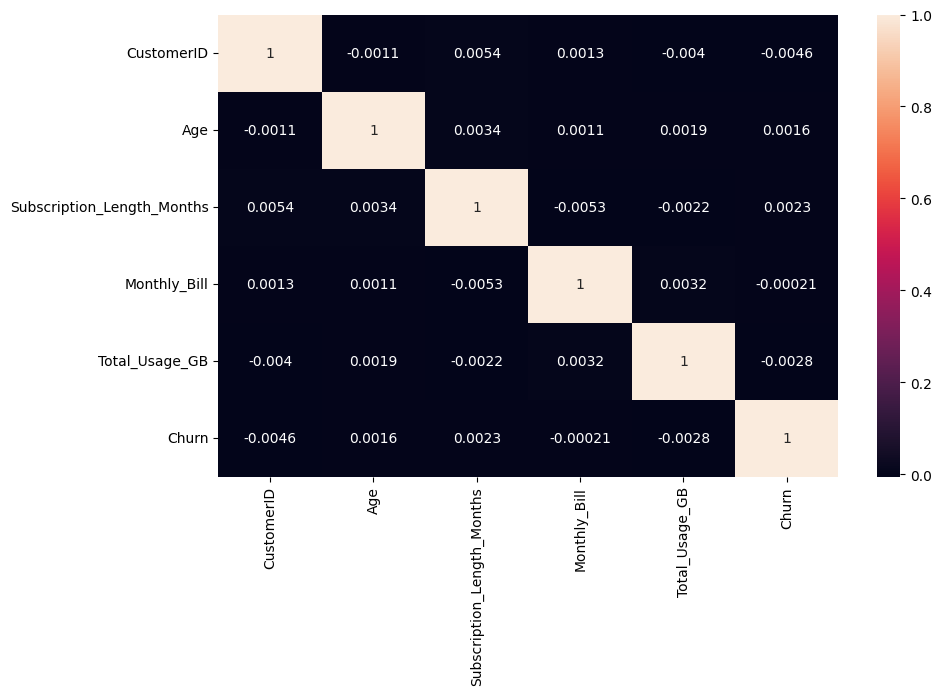

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

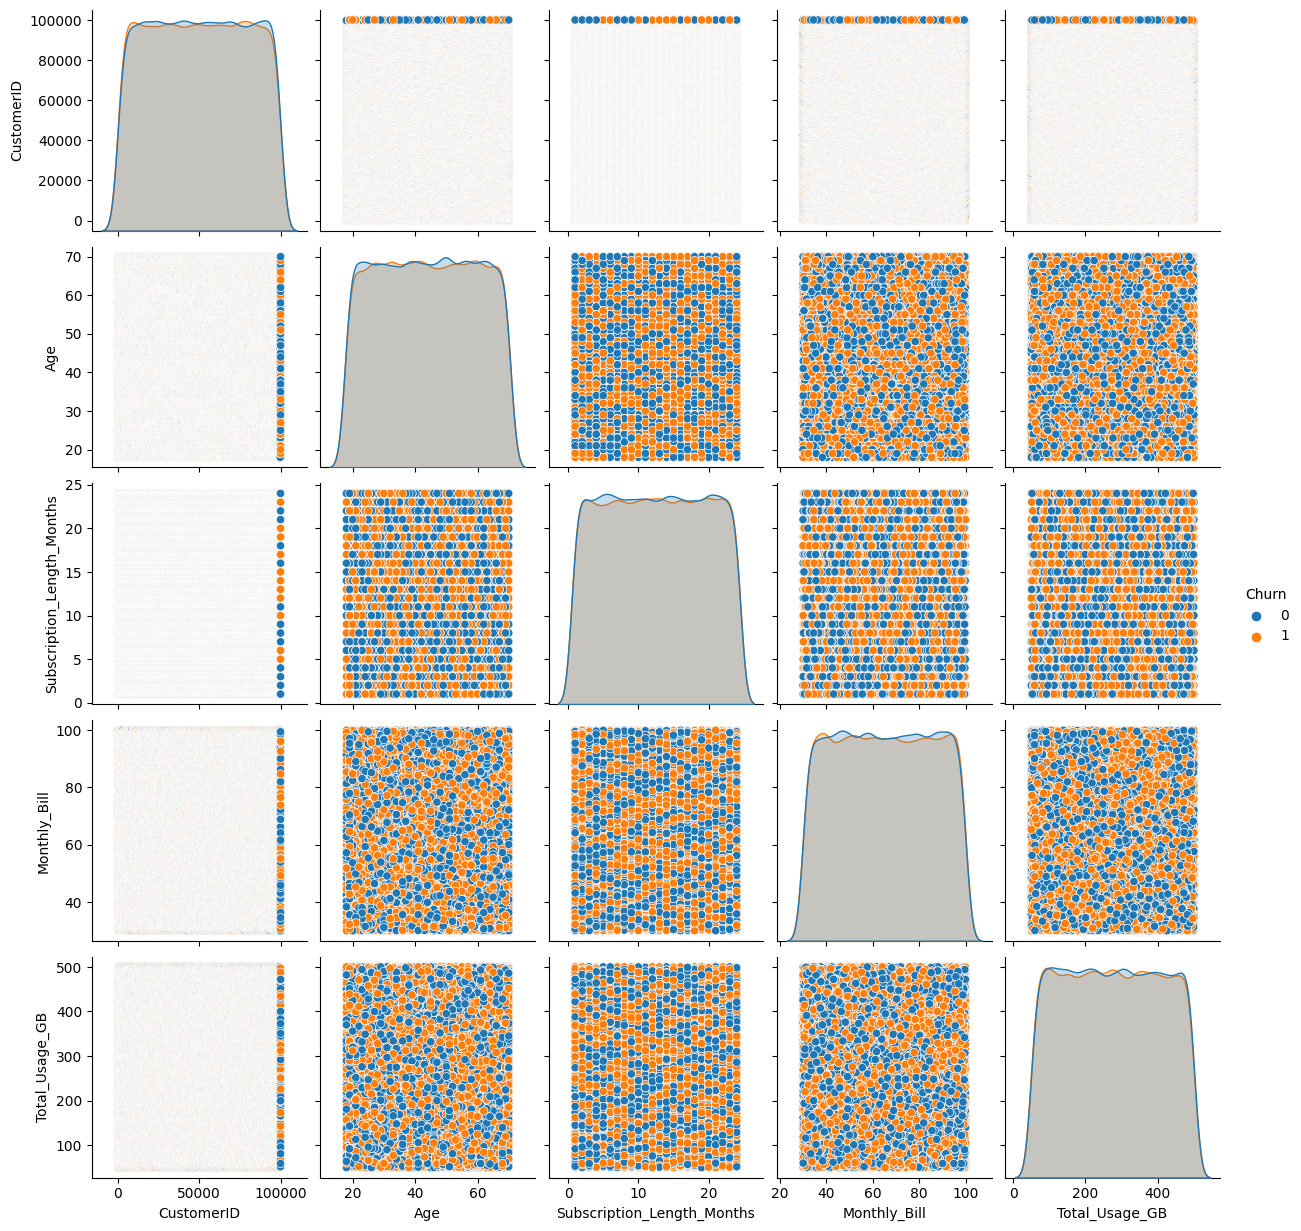

In [ ]:
sns.pairplot(df, hue='Churn')

<Axes: xlabel='Churn'>

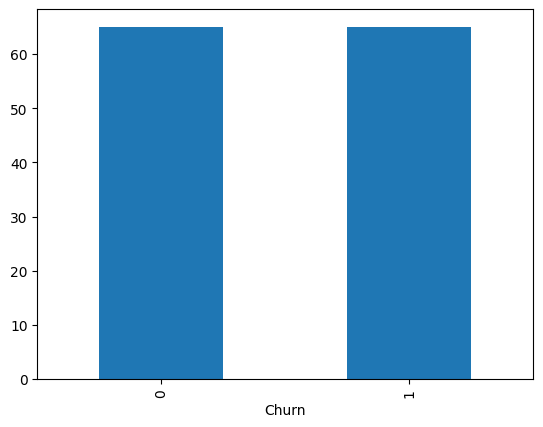

In [ ]:
df.groupby('Churn')['Monthly_Bill'].mean().plot.bar()

Q3 Prepare the data for machine learning by encoding categorical variables and splitting it into
training and testing sets

In [ ]:
col_list = []
for col in df.columns:
    if(df[col].dtype == "object"):
        col_list.append(col)
print(col_list)

['Gender', 'Location']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for i in col_list:
    df[i] = label_encoder.fit_transform(df[i])

In [ ]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,1,2,17,73.36,236,0
1,2,62,0,4,1,48.76,172,0
2,3,24,0,2,5,85.47,460,0
3,4,36,0,3,3,97.94,297,1
4,5,46,0,3,19,58.14,266,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Engineering

Q1 Generate relevant features from the dataset that can help improve the model's prediction
accuracy.

In [ ]:
df['SL'] = df['Monthly_Bill'] * df['Subscription_Length_Months']

In [ ]:
df['Avg_Monthly_Bill'] = df['Monthly_Bill'] / df['Subscription_Length_Months']

In [ ]:
df['Bill_Ratio'] = df['Monthly_Bill'] / df['Total_Usage_GB']

In [ ]:
df['Usage_per_Pack'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

Q2 Apply feature scaling or normalization if necessary.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building:

Q1 Selecting Logistic Regression model and Training and validating the selected model on the training dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4934
Precision: 0.4876847290640394
Recall: 0.46672952586206895
F1 Score: 0.47697708032211444


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from scipy.stats import randint

param_dist = {'n_estimators': randint(100, 1000),
              'max_depth': randint(3, 10),
              'learning_rate': [0.01, 0.1, 0.2]}

from sklearn.model_selection import RandomizedSearchCV


model = XGBClassifier(n_estimators=500, max_depth=7, learning_rate=0.1)
# model.fit(X_train, y_train)

random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, scoring='f1', cv=5)
random_search.fit(X_train, y_train)
print(random_search.best_params_)



{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 824}


In [ ]:
model = XGBClassifier(n_estimators=824, max_depth=7, learning_rate=0.2)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=824, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.49746666666666667
Precision: 0.49233149468586035
Recall: 0.4929283405172414
F1 Score: 0.49262973682439254
